ASSIGNMENT 8.1 | SAVING MODELS
--- | ---
Name: |  **Feliciano, Kurt**<br>
Course and Section: | **CPE 019 - CPE32S3**<br>
Date Submitted: | **04-19-2024**<br>
Instructor: | **Engr. Roman Richard**<br>
<hr> | <hr>


In [ ]:
!pip install h5py
!pip install ucimlrepo
!pip install scikeras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import necessary libraries
import numpy
import os
from ucimlrepo import fetch_ucirepo
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from keras.models  import Sequential, model_from_json
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [ ]:
# fetch dataset
breastCancer = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breastCancer.data.features
y = breastCancer.data.targets

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


In [ ]:
X.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [ ]:
map = {'B': 0, 'M': 1}
y['Diagnosis'] = y['Diagnosis'].map(map)

<ipython-input-71-ee363d5d8467>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = y['Diagnosis'].map(map)


Observations :
- No missing values, which means I don't have to use the mean of the values of that specific column to fill for them.
- The values for the Diagnosis column in y has the values of B and M, Benign and Malginant, and I have replaced those with 0 and 1, respectively.

In [ ]:
# classify training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11111)

# standardize features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(30, activation="relu",  input_shape=(30,)),
    Dense(30, activation="relu"),
    Dense(1, activation="sigmoid")
])

adam_opt = Adam(learning_rate = 0.1)
model.compile(optimizer=adam_opt, loss='binary_crossentropy', metrics=['accuracy'])
getModel = model.fit(X_train_norm, y_train, epochs=10, batch_size=500, validation_split = 0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4643 - loss: 0.7516 - val_accuracy: 0.9121 - val_loss: 0.2647
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9066 - loss: 0.2385 - val_accuracy: 0.9121 - val_loss: 0.1963
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9560 - loss: 0.1290 - val_accuracy: 0.9670 - val_loss: 0.0970
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9643 - loss: 0.1009 - val_accuracy: 0.9780 - val_loss: 0.1084
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9808 - loss: 0.0832 - val_accuracy: 0.9780 - val_loss: 0.1259
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9835 - loss: 0.0909 - val_accuracy: 0.9780 - val_loss: 0.1305
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9863 - loss: 0.0759 - val_accuracy: 0.9780 - val_loss: 0.1257
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.9863 - loss: 0.0522 - val_accuracy: 0.9670 - val_loss: 0.1165
Epoch 9/10

Observations :     
- Followed similar procedures to former activities, encountered some errors on a dataset I tried to use before this one.
- Did not perform KFold as the base accuracy seems high enough for me not to optimize it any longer.

<h2> <b> == SAVING THE MODEL AS HDF5 ==

In [ ]:
from keras.models import load_model

In [ ]:
scores = model.evaluate(X_test_norm, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
model.save("model.h5")
print("Saved model to disk")
print("Loaded model from disk")
loaded_model = load_model('model.h5')
print("%s: %.2f%%" % (loaded_model.metrics_names[1], scores[1]*100))

compile_metrics: 96.49%
Saved model to disk
Loaded model from disk
compile_metrics: 96.49%


<h2> <b>== SAVING THE MODEL AS JSON ==

In [ ]:
from keras.models import model_from_json

In [ ]:
scores = model.evaluate(X_test_norm, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Colab Notebooks/model.weights.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/model.weights.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test_norm, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

compile_metrics: 96.49%
Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Loaded model from disk
compile_metrics: 96.49%


<h2> <b> == SAVING THE MODEL AS YAML ==

In [ ]:
scores = model.evaluate(X_test_norm, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Colab Notebooks/model_yaml.weights.h5")
print("Saved model to disk")

# later...

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/model_yaml.weights.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test_norm, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

compile_metrics: 96.49%
Saved model to disk
Loaded model from disk


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


compile_metrics: 96.49%


<h2><b> == CHECKPOINT NEURAL NETWORK MODEL IMPROVEMENTS ==

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_model = Sequential([
    Dense(30, activation="relu",  input_shape=(30,)),
    Dense(30, activation="relu"),
    Dense(1, activation="sigmoid")
])

adam_opt = Adam(learning_rate = 0.1)
checkpoint_model.compile(optimizer=adam_opt, loss='binary_crossentropy', metrics=['accuracy'])

filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

getModel = checkpoint_model.fit(X_train_norm, y_train, validation_split=0.33, epochs=10, batch_size=500, callbacks=callbacks_list, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_accuracy improved from -inf to 0.90728, saving model to weights-improvement-01-0.91.hdf5.keras

Epoch 2: val_accuracy improved from 0.90728 to 0.92715, saving model to weights-improvement-02-0.93.hdf5.keras

Epoch 3: val_accuracy improved from 0.92715 to 0.94040, saving model to weights-improvement-03-0.94.hdf5.keras

Epoch 4: val_accuracy improved from 0.94040 to 0.96026, saving model to weights-improvement-04-0.96.hdf5.keras

Epoch 5: val_accuracy did not improve from 0.96026

Epoch 6: val_accuracy improved from 0.96026 to 0.98013, saving model to weights-improvement-06-0.98.hdf5.keras

Epoch 7: val_accuracy did not improve from 0.98013

Epoch 8: val_accuracy did not improve from 0.98013

Epoch 9: val_accuracy did not improve from 0.98013

Epoch 10: val_accuracy did not improve from 0.98013


<h2> <b> == CHECKPOINT BEST NEURAL NETWORK MODEL ONLY ==

In [ ]:
checkpoint_best_model = Sequential([
    Dense(30, activation="relu",  input_shape=(30,)),
    Dense(30, activation="relu"),
    Dense(1, activation="sigmoid")
])

adam_opt = Adam(learning_rate = 0.1)
checkpoint_best_model.compile(optimizer=adam_opt, loss='binary_crossentropy', metrics=['accuracy'])

filepath="weights.best.hdf5.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

checkpoint_best_model.fit(X_train_norm, y_train, validation_split=0.33, epochs=10, batch_size=10, callbacks=callbacks_list, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_accuracy improved from -inf to 0.90066, saving model to weights.best.hdf5.keras

Epoch 2: val_accuracy improved from 0.90066 to 0.96026, saving model to weights.best.hdf5.keras

Epoch 3: val_accuracy did not improve from 0.96026

Epoch 4: val_accuracy did not improve from 0.96026

Epoch 5: val_accuracy did not improve from 0.96026

Epoch 6: val_accuracy did not improve from 0.96026

Epoch 7: val_accuracy improved from 0.96026 to 0.98013, saving model to weights.best.hdf5.keras

Epoch 8: val_accuracy did not improve from 0.98013

Epoch 9: val_accuracy did not improve from 0.98013

Epoch 10: val_accuracy did not improve from 0.98013


<h2> <b> == LOAD A SAVED NEURAL NETWORK MODEL ==

In [ ]:
loading_model = Sequential([
    Dense(30, activation="relu", kernel_initializer = 'uniform', input_shape=(30,)),
    Dense(30, kernel_initializer = 'uniform', activation="relu"),
    Dense(1, kernel_initializer = 'uniform', activation="sigmoid")
])

loading_model.load_weights("weights.best.hdf5")

adam_opt = Adam(learning_rate = 0.1)
loading_model.compile(optimizer=adam_opt, loss='binary_crossentropy', metrics=['accuracy'])
print("Created model and loaded weights from file")

scores = model.evaluate(X_train_norm, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
compile_metrics: 97.14%


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h2> <b> == VISUALIZE MODEL TRAINING HISTORY IN KERAS ==

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


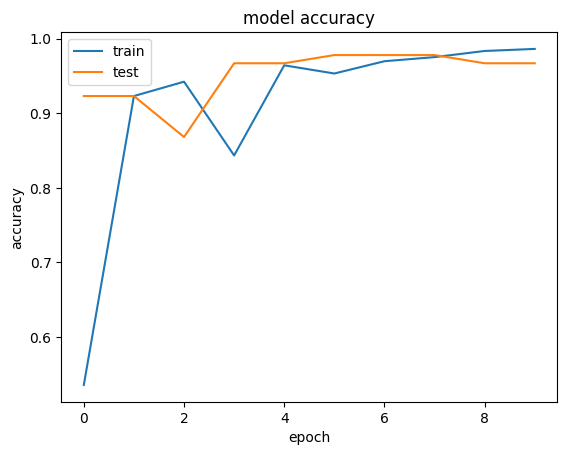

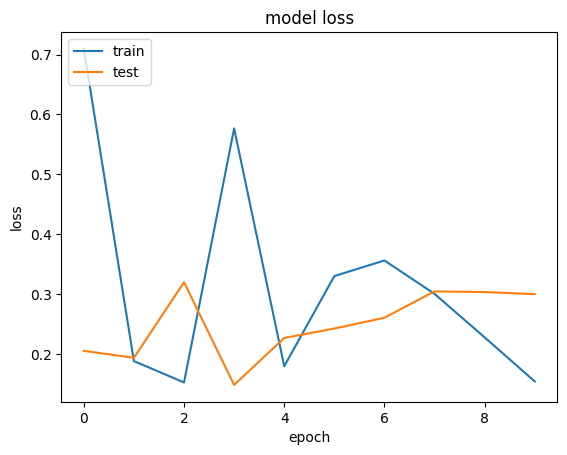

In [ ]:
history_model = Sequential([
    Dense(30, activation="relu",  input_shape=(30,)),
    Dense(30, activation="relu"),
    Dense(1, activation="sigmoid")
])

adam_opt = Adam(learning_rate = 0.1)
history_model.compile(optimizer=adam_opt, loss='binary_crossentropy', metrics=['accuracy'])
getModel = history_model.fit(X_train_norm, y_train, epochs=10, batch_size=500, validation_split = 0.2, verbose = 0)

print(getModel.history.keys())
# summarize history for accuracy
plt.plot(getModel.history['accuracy'])
plt.plot(getModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(getModel.history['loss'])
plt.plot(getModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2> <b> == DROPOUT REGULARIZATION ==

In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# baseline
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(30, input_shape=(30,), activation='relu'))
	model.add(Dense(30,  activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.01, momentum=0.8)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=10, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_s

Baseline: 97.19% (1.61%)


<h2> <b> == DROPOUT ON THE VISIBLE LAYER ==

In [ ]:
from tensorflow.keras.constraints import MaxNorm

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# dropout in the input layer with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dropout(0.2, input_shape=(30,)))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=10, batch_size=500, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` a

Visible: 96.48% (2.36%)


<h2> <b> == DROPOUT ON THE HIDDEN LAYER ==

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(30, input_shape=(30,), activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=10, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_s

Hidden: 97.19% (1.61%)


<h2> <b> == TIME BASED LEARNING RATE SCHEDULE ==

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
encoder = LabelEncoder()
encoder.fit(y)
Y = encoder.transform(y)
# create model
model = Sequential()
model.add(Dense(30, input_shape=(30,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=500, verbose=2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay

1/1 - 2s - 2s/step - accuracy: 0.4436 - loss: 223.4457 - val_accuracy: 0.7713 - val_loss: 154934.7656
Epoch 2/10
1/1 - 0s - 313ms/step - accuracy: 0.5564 - loss: 276308.1875 - val_accuracy: 0.2287 - val_loss: 7.2899
Epoch 3/10
1/1 - 0s - 61ms/step - accuracy: 0.4436 - loss: 5.1882 - val_accuracy: 0.7713 - val_loss: 0.6645
Epoch 4/10
1/1 - 0s - 58ms/step - accuracy: 0.5564 - loss: 0.6884 - val_accuracy: 0.7713 - val_loss: 0.6532
Epoch 5/10
1/1 - 0s - 54ms/step - accuracy: 0.5564 - loss: 0.6873 - val_accuracy: 0.7713 - val_loss: 0.6443
Epoch 6/10
1/1 - 0s - 57ms/step - accuracy: 0.5564 - loss: 0.6869 - val_accuracy: 0.7713 - val_loss: 0.6372
Epoch 7/10
1/1 - 0s - 58ms/step - accuracy: 0.5564 - loss: 0.6868 - val_accuracy: 0.7713 - val_loss: 0.6318
Epoch 8/10
1/1 - 0s - 137ms/step - accuracy: 0.5564 - loss: 0.6869 - val_accuracy: 0.7713 - val_loss: 0.6277
Epoch 9/10
1/1 - 0s - 61ms/step - accuracy: 0.5564 - loss: 0.6871 - val_accuracy: 0.7713 - val_loss: 0.6247
Epoch 10/10
1/1 - 0s - 63ms

<h2> <b> == DROP BASED LEARNING RATE SCHEDULE ==

In [ ]:
import math
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
# create model
model = Sequential()
model.add(Dense(30, input_shape=(30,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=500, callbacks=callbacks_list, verbose=2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 1s - 923ms/step - accuracy: 0.4436 - loss: 75.3332 - val_accuracy: 0.7713 - val_loss: 120850.8438 - learning_rate: 0.1000
Epoch 2/10
1/1 - 0s - 105ms/step - accuracy: 0.5564 - loss: 215583.5938 - val_accuracy: 0.7713 - val_loss: 0.6770 - learning_rate: 0.1000
Epoch 3/10
1/1 - 0s - 55ms/step - accuracy: 0.5564 - loss: 0.6902 - val_accuracy: 0.7713 - val_loss: 0.6746 - learning_rate: 0.1000
Epoch 4/10
1/1 - 0s - 50ms/step - accuracy: 0.5564 - loss: 0.6898 - val_accuracy: 0.7713 - val_loss: 0.6715 - learning_rate: 0.1000
Epoch 5/10
1/1 - 0s - 59ms/step - accuracy: 0.5564 - loss: 0.6893 - val_accuracy: 0.7713 - val_loss: 0.6679 - learning_rate: 0.1000
Epoch 6/10
1/1 - 0s - 130ms/step - accuracy: 0.5564 - loss: 0.6888 - val_accuracy: 0.7713 - val_loss: 0.6639 - learning_rate: 0.1000
Epoch 7/10
1/1 - 0s - 53ms/step - accuracy: 0.5564 - loss: 0.6883 - val_accuracy: 0.7713 - val_loss: 0.6597 - learning_rate: 0.1000
Epoch 8/10
1/1 - 0s - 71ms/step - accuracy: 0.5564 - loss: 0.6879 - val_a

<h2> <b> == CONCLUSION ==

In this activity, I have found a dataset that suits the instructions perfectly, and also goes well in terms of accuracy, which required little preprocessing and still yielded good results. I found it interesting how I could save the models into my google drive, which is very useful as we this means we can also load them up in other activities if needed. Though I had to make several tweaks to the code to make this whole activity work, it was fun knowing how far deep learning has come, as some methods aren't working anymore and I have found new ways to do what the instructions indicates.

Moving onto the procedure itself, the best neural network checkpoint seemed to be the most useful as a whole, as we can save, as the name suggests, the best neural network model that it can provide. This lessens the files to save, eating up storage. Visualizing the history can also be helpful to see how the model is doing, if some necessary changes have to be done, and also avoid having to look through all the numerical results that can be seen once the code blocks are done running when the verbose is set to 0.

Up next is dropout, which can also be helpful in improving generalization, further fixing the issues regarding overfitting. We all know how overfitting affects the performance of our models, so having this extra protective measure aside from scaling the data could be very useful, especially in larger datasets. Lastly, both time based and drop based learning rates can be used that convergence will be more secure, as it lowers the learning rate as the training goes by. This also means that we won't be overshooting the optimal solution, making our model more effective.

Overall, this activity taught me more ways to work with my models, and I will be using these in future activities as well. Knowing how these different functions work create a solid foundation on how we understand models, and even if we won't use them all the time, it's still good to know specific features that may come in handy at some point in our deep learning studies.